___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Tree Types Prediction Project***". This is the second medium project of ***Machine Learning*** course.

In this project, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering using SQLite local database. 

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering (if needed)


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement XGBoost Classifer
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement KNN Classifer
- Implement Random Forest Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

#### *ii. Load Dataset*

In [2]:
data = pd.read_csv("covtype.csv")
df = data.copy()

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
df.shape

(581012, 55)

In [5]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [6]:
df.head().T

,0,1,2,3,4
Elevation,2596,2590,2804,2785,2595
Aspect,51,56,139,155,45
Slope,3,2,9,18,2
Horizontal_Distance_To_Hydrology,258,212,268,242,153
Vertical_Distance_To_Hydrology,0,-6,65,118,-1
Horizontal_Distance_To_Roadways,510,390,3180,3090,391
Hillshade_9am,221,220,234,238,220
Hillshade_Noon,232,235,238,238,234
Hillshade_3pm,148,151,135,122,150
Horizontal_Distance_To_Fire_Points,6279,6225,6121,6211,6172


In [7]:
df.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [8]:
for col in df.columns:
    print(f"{col:50} sütununda {df[col].nunique()}  tane value var.")

Elevation                                          sütununda 1978  tane value var.
Aspect                                             sütununda 361  tane value var.
Slope                                              sütununda 67  tane value var.
Horizontal_Distance_To_Hydrology                   sütununda 551  tane value var.
Vertical_Distance_To_Hydrology                     sütununda 700  tane value var.
Horizontal_Distance_To_Roadways                    sütununda 5785  tane value var.
Hillshade_9am                                      sütununda 207  tane value var.
Hillshade_Noon                                     sütununda 185  tane value var.
Hillshade_3pm                                      sütununda 255  tane value var.
Horizontal_Distance_To_Fire_Points                 sütununda 5827  tane value var.
Wilderness_Area1                                   sütununda 2  tane value var.
Wilderness_Area2                                   sütununda 2  tane value var.
Wilderness_Area3  

In [9]:
numeric = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)


['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [10]:
df[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


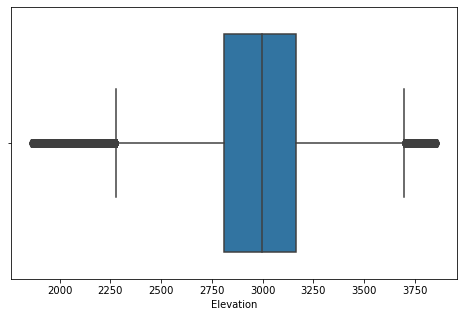

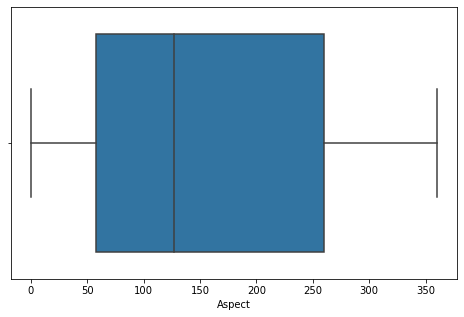

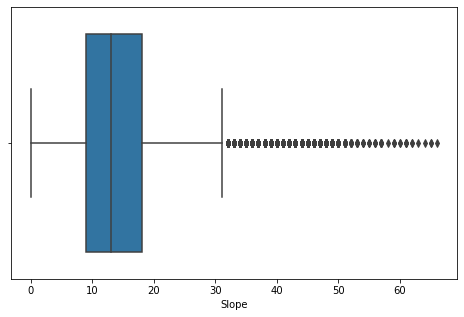

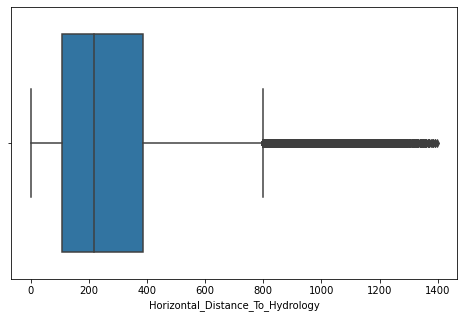

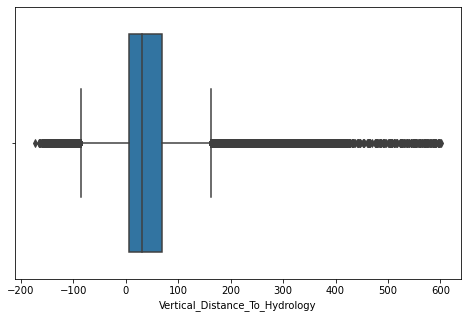

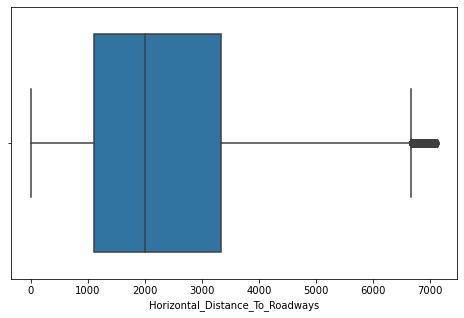

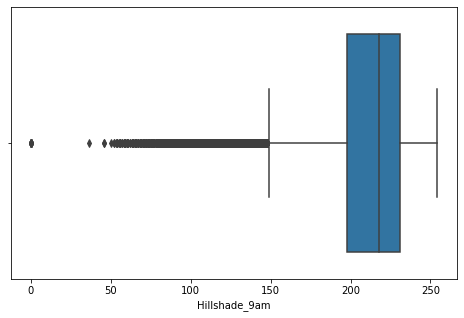

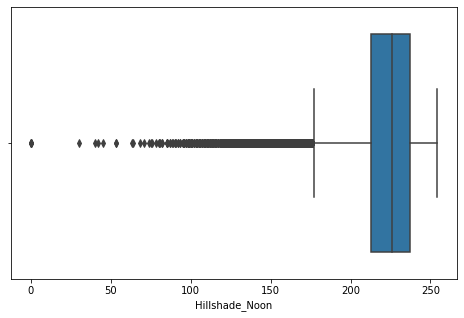

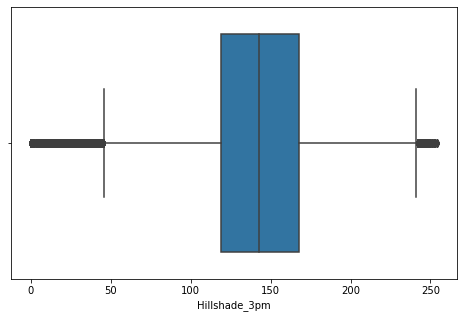

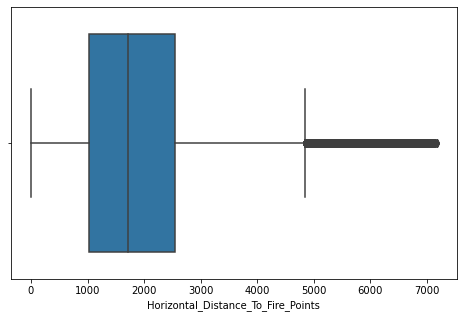

In [11]:
for i in numeric:
    plt.figure(figsize=(8,5))
    sns.boxplot(df[(i)]);

In [12]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 10)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 90)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count


In [13]:
# loop through all columns to see if there are any outliers
for column in numeric:
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))


There are 125 outliers in Vertical_Distance_To_Hydrology
There are 9 outliers in Hillshade_Noon


***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [14]:
df.isnull().any().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

In [15]:
from scipy.stats import stats

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection are given below.

In [16]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

In [17]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

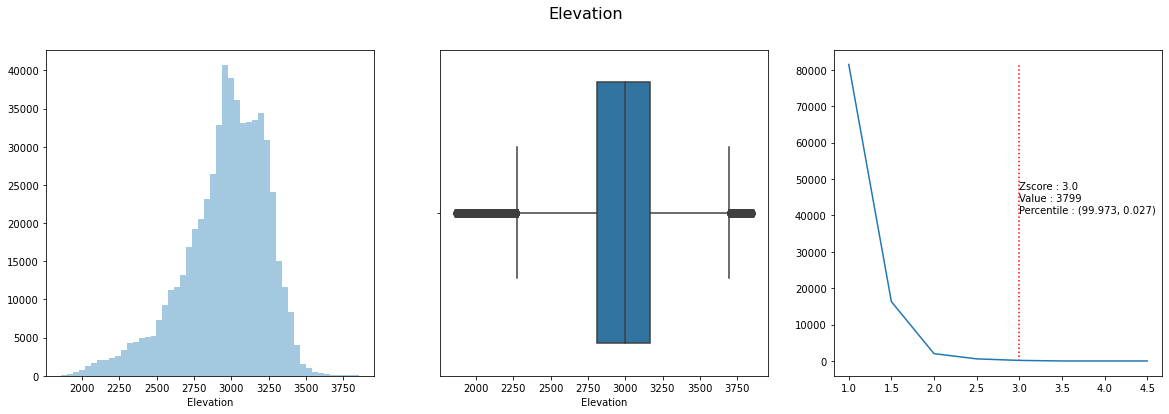

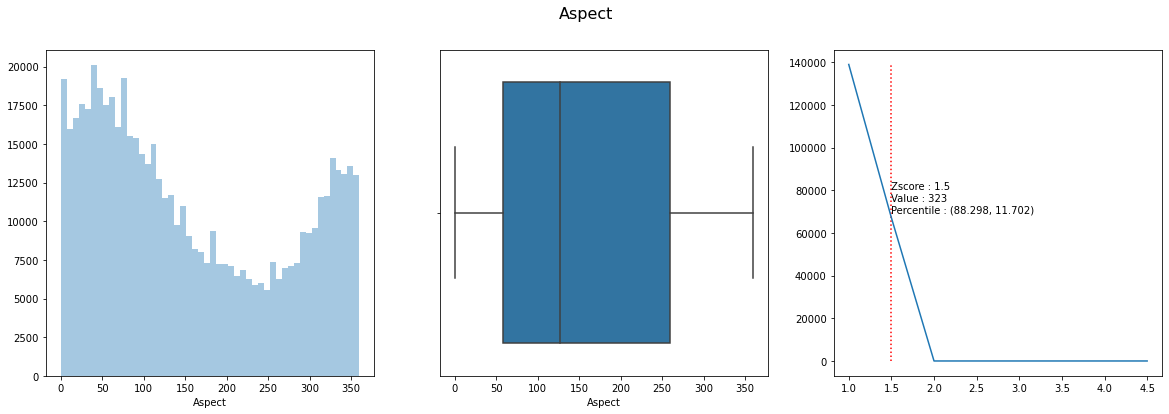

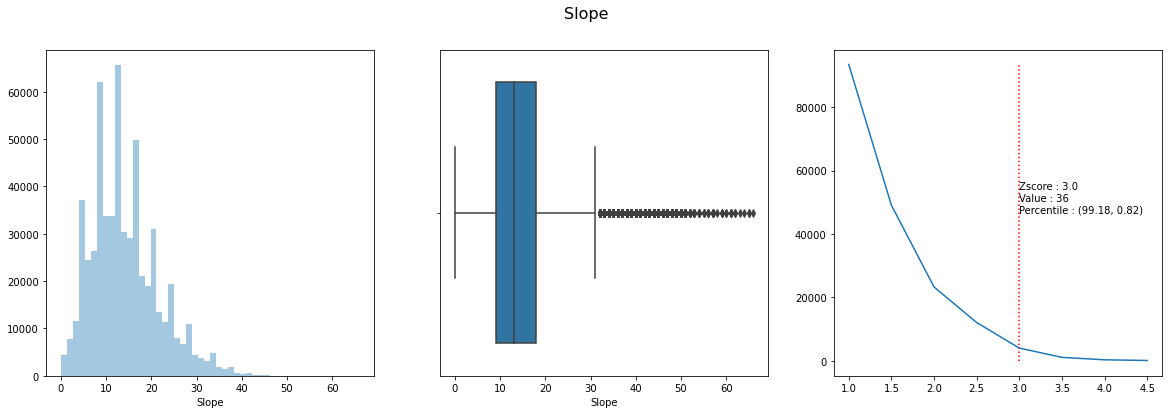

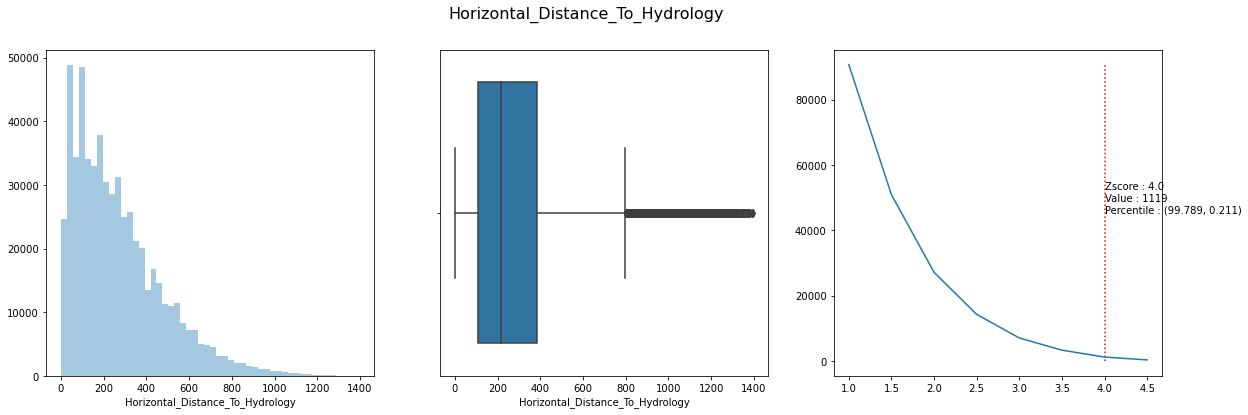

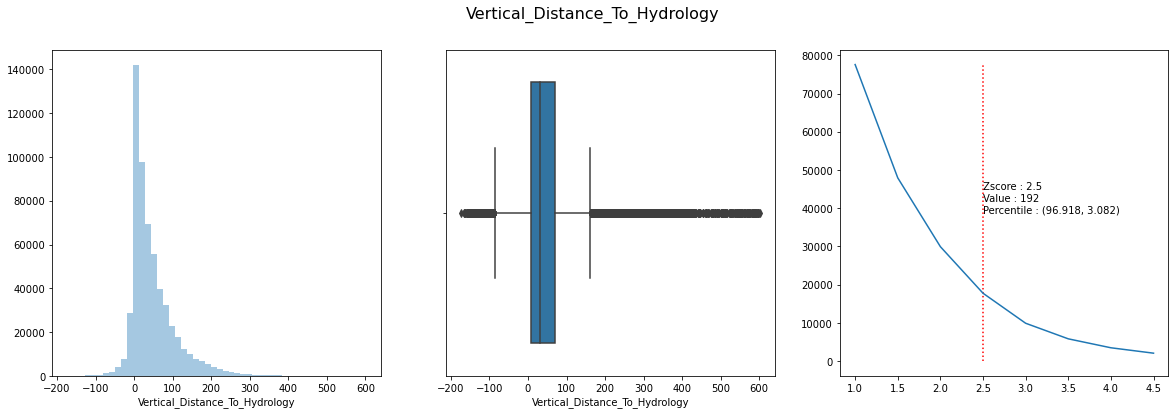

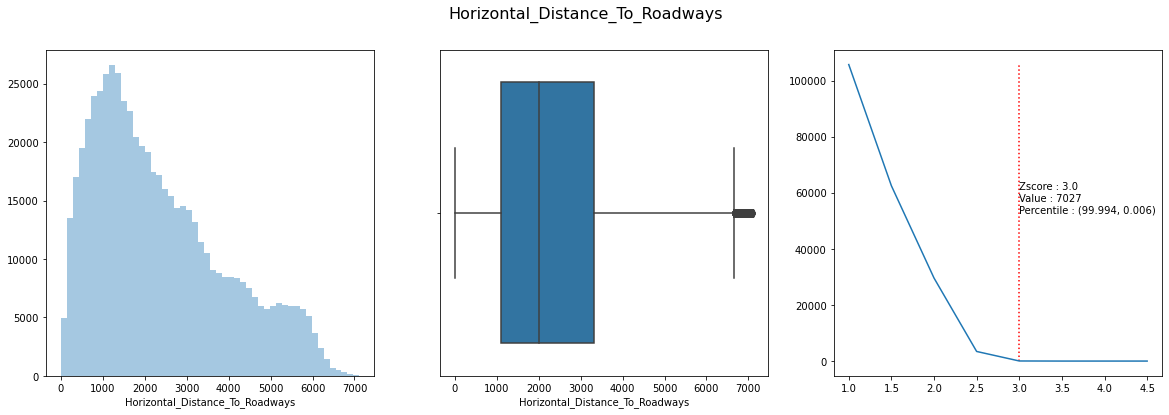

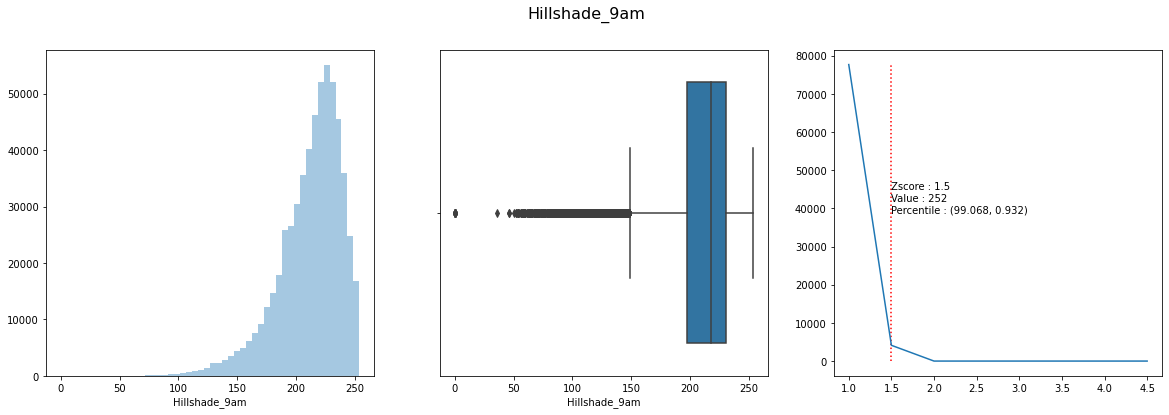

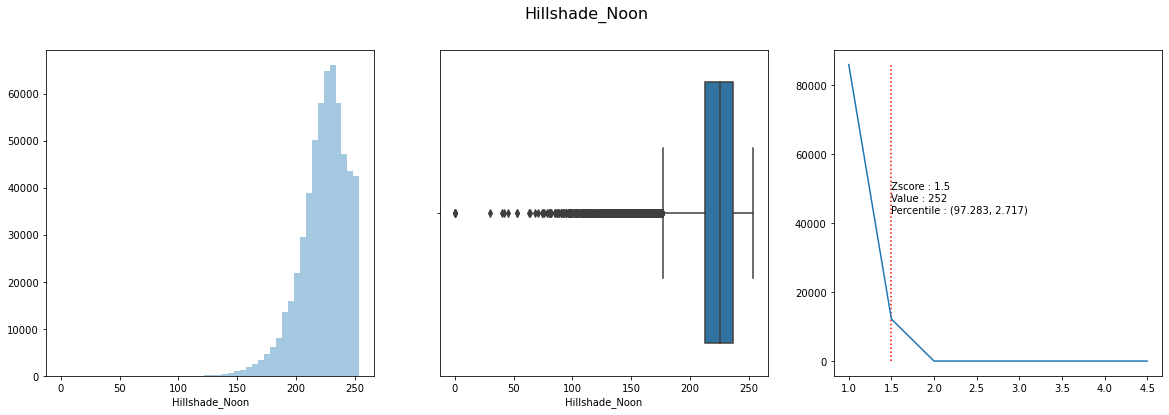

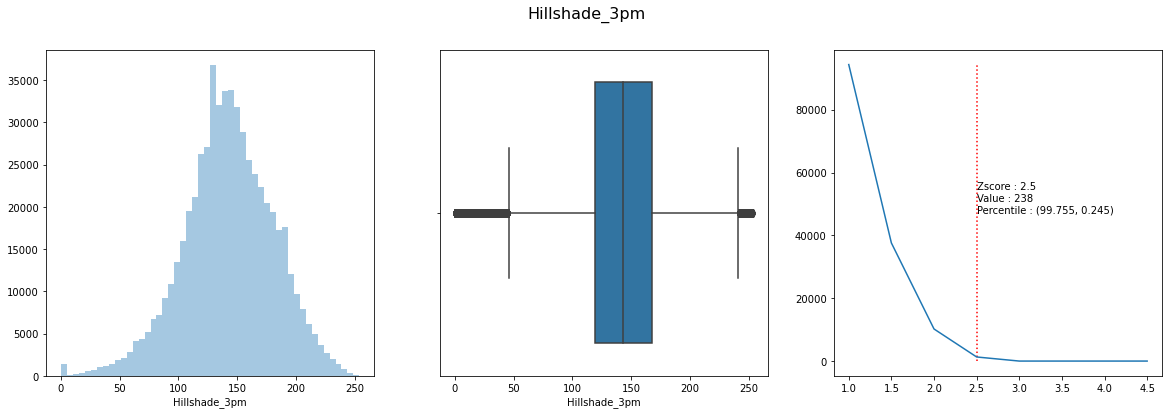

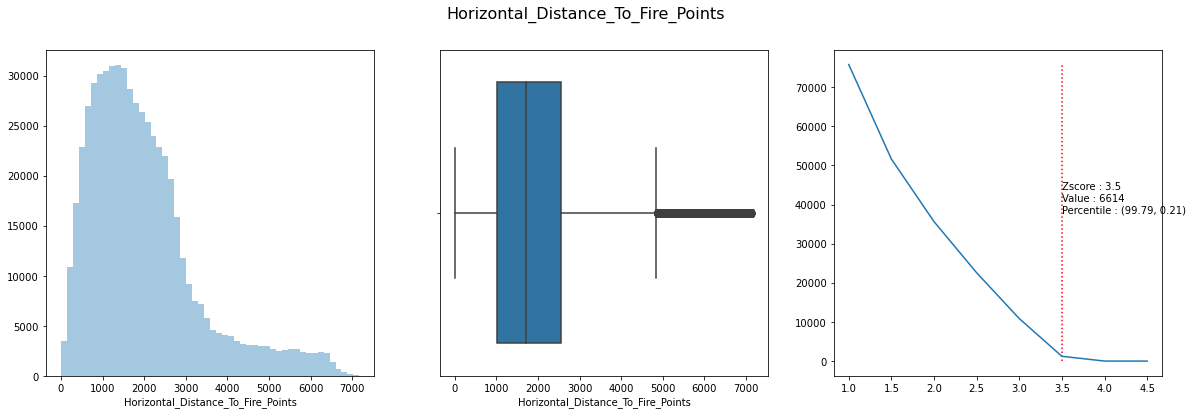

In [18]:
for col in numeric:
    outlier_inspect(df, col)


#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

In [19]:
def detect_outliers(df, col_name):
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count
for col in numeric:
    if detect_outliers(df, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(df, col)[2], col))


There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points


In [20]:
for col in numeric:
    if detect_outliers(df, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(df, col)[2], col))


There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points


In [21]:
df = df[(df['Slope'] > detect_outliers(df, 'Slope')[0]) &
              (df['Slope'] < detect_outliers(df, 'Slope')[1])]
df.shape


(580640, 55)

In [22]:
df = df[(df['Horizontal_Distance_To_Hydrology'] > detect_outliers(df, 'Horizontal_Distance_To_Hydrology')[0]) &
              (df['Horizontal_Distance_To_Hydrology'] < detect_outliers(df, 'Horizontal_Distance_To_Hydrology')[1])]
df.shape

(580226, 55)

In [23]:
df = df[(df['Vertical_Distance_To_Hydrology'] > detect_outliers(df, 'Vertical_Distance_To_Hydrology')[0]) &
              (df['Vertical_Distance_To_Hydrology'] < detect_outliers(df, 'Vertical_Distance_To_Hydrology')[1])]
df.shape

(574977, 55)

In [24]:
df = df[(df['Hillshade_9am'] > detect_outliers(df, 'Hillshade_9am')[0]) &
              (df['Hillshade_9am'] < detect_outliers(df, 'Hillshade_9am')[1])]
df.shape

(573831, 55)

In [25]:
df = df[(df['Hillshade_Noon'] > detect_outliers(df, 'Hillshade_Noon')[0]) &
              (df['Hillshade_Noon'] < detect_outliers(df, 'Hillshade_Noon')[1])]
df.shape

(572799, 55)

In [26]:
df = df[(df['Horizontal_Distance_To_Fire_Points'] > detect_outliers(df, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (df['Horizontal_Distance_To_Fire_Points'] < detect_outliers(df, 'Horizontal_Distance_To_Fire_Points')[1])]
df.shape


(572794, 55)

***
***

In [27]:
numeric

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

## 3.  Feature Engineering(If needed)

#sns.pairplot(data = df[['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',"Cover_Type"]], hue = "Cover_Type")

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [29]:
X = df.drop("Cover_Type",axis = 1)
y = df["Cover_Type"]


In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [38]:
from xgboost import XGBClassifier


In [ ]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)


In [ ]:
y_pred = xgb.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate


In [ ]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


In [35]:
from sklearn.model_selection import GridSearchCV


In [39]:
param_grid = {"n_estimators":[100, 300],'max_depth':[3,5,6], "learning_rate": [0.1, 0.3],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}


In [40]:
%%time
xgb = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement KNeighborsClassifer

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Compare The Models

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___